# 🎯 **Student Performance Indicator**

## 🔄 **Life Cycle of a Machine Learning Project**
1. Understanding the Problem Statement  
2. Data Collection  
3. Data Checks to Perform  
4. Exploratory Data Analysis  
5. Data Pre-Processing  
6. Model Training  
7. Choose Best Model  

---

## 🧠 **1) Problem Statement**

This project aims to understand how the student's performance (test scores) is affected by other variables such as **Gender**, **Ethnicity**, **Parental Level of Education**, **Lunch**, and **Test Preparation Course**.

---

## 📊 **2) Data Collection**

**Dataset Source:** [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

The dataset consists of **8 columns** and **1000 rows**.

---

### 🧩 **2.1 Import Data and Required Packages**

Importing **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **Warnings** libraries.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/stud.csv')

**Show Top 5 Records**

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset Information

The dataset contains information about students and their exam scores. The columns are:

- **gender**: sex of students → (Male / Female)  
- **race/ethnicity**: ethnicity of students → (Group A, B, C, D, E)  
- **parental level of education**: parents' final education → (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch**: having lunch before test → (standard or free/reduced)  
- **test preparation course**: completed or not completed before test  
- **math score**: student's score in math  
- **reading score**: student's score in reading  
- **writing score**: student's score in writing  

---

## 3. Data Checks to Perform

Before analysis, it is important to check the dataset for cleanliness and consistency. The following checks should be performed:

1. **Check Missing Values**: Identify if any column has missing data.  
2. **Check Duplicates**: Verify if there are duplicate rows that need removal.  
3. **Check Data Types**: Ensure that numeric columns are of numeric type and categorical columns are of object/string type.  
4. **Check Number of Unique Values**: See how many unique entries are present in each column.  
5. **Check Statistics of Dataset**: Summarize numeric columns to check mean, median, min, max, etc.  
6. **Check Various Categories in Categorical Columns**: Identify all possible categories in categorical features like `gender`, `race/ethnicity`, etc.  

---

### 3.1 Check Missing Values

The first step in data cleaning is to **verify if there are any missing values** in the dataset. Missing values can affect analysis and model training, so they should either be imputed or removed depending on the context.


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There is no missing values in the dataset**


**3.2 Check Duplicates**

In [6]:
df.duplicated().sum()

np.int64(0)

**There are no duplicates values in the data set**

**3.3 Check data types**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Checking the number of unique values of each column**

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 Check statistics of data set**

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

-- From above description of numerical data, all means are very close to each other - between 66 and 68.05;

-- All standard deviations are also close - between 14.6 and 15.19;

-- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

**3.7 Exploring Data**

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


**3.8 Adding columns for "Total Score" and "Average"**

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Insights

From initial data checks and summary statistics, we can observe:

- Students have performed the **worst in Math**.  
- The **best performance is in the Reading section**.  

These insights help us understand where students are struggling and where they excel, guiding further analysis and model building.

---

## 4. Exploring Data (Visualization)

Visualization helps in understanding patterns and distributions in the dataset. For this project, we focus on visualizing **average score distributions** to draw meaningful conclusions.

---

### 4.1 Visualize Average Score Distribution

Two commonly used visualization techniques for continuous numeric data:

1. **Histogram**  
   - Shows the frequency distribution of numeric data.  
   - Helps identify the range in which most students scored and detect skewness.

2. **Kernel Density Estimate (KDE)**  
   - Shows a smooth probability distribution of numeric data.  
   - Useful for understanding the density and distribution pattern of scores.

---

### 4.1.1 Histogram & KDE

- **Histogram** and **KDE plots** are used together to see both the **frequency** and **distribution shape** of scores.  
- By plotting Math, Reading, and Writing scores, we can visually compare performance across subjects.  

- Example observations we may get from these plots:  
  - Math scores are skewed toward the lower range.  
  - Reading scores have a higher concentration in the upper range.  
  - Writing scores are moderately distributed.  

These visualizations give a clear understanding of where students are performing well or struggling.


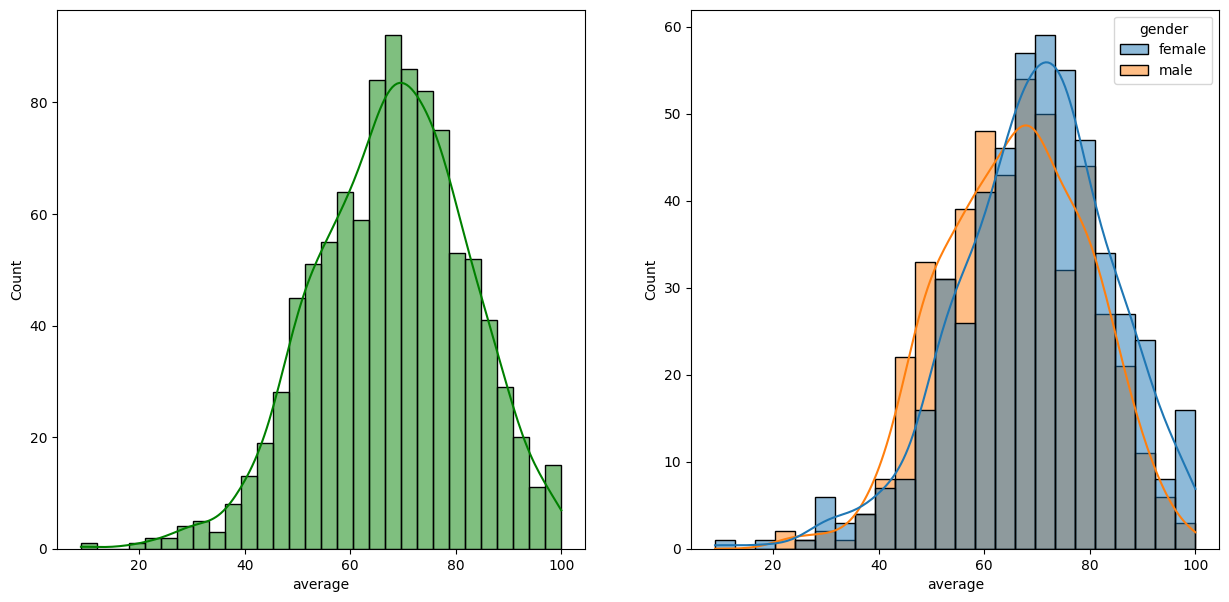

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

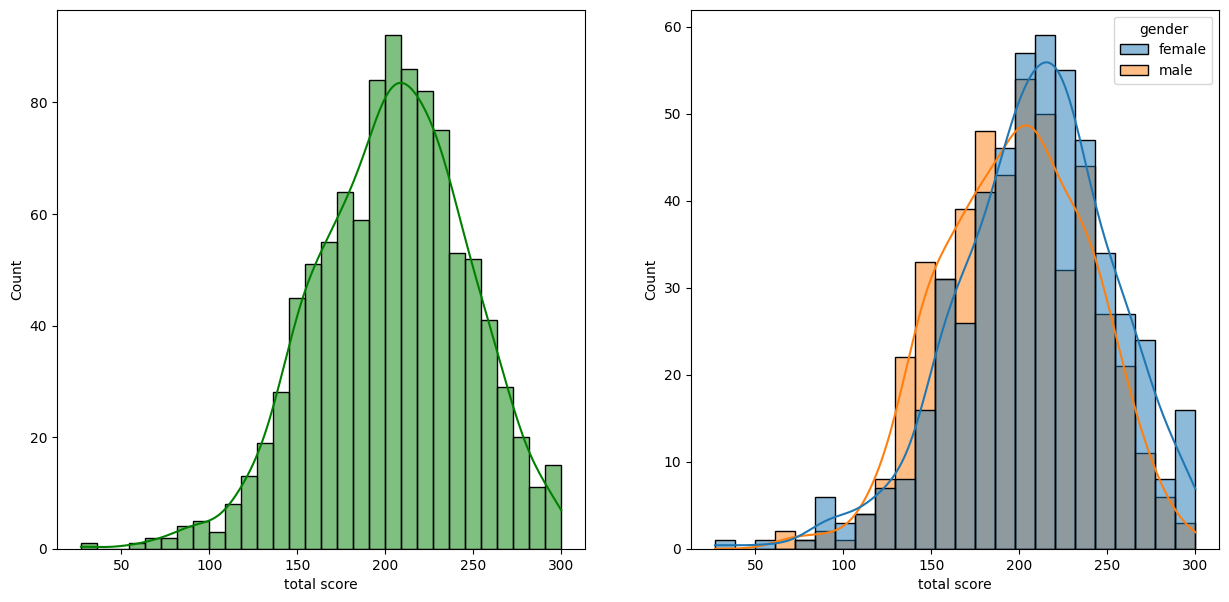

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

**Insights**
--Female students tend to perform well then male students.

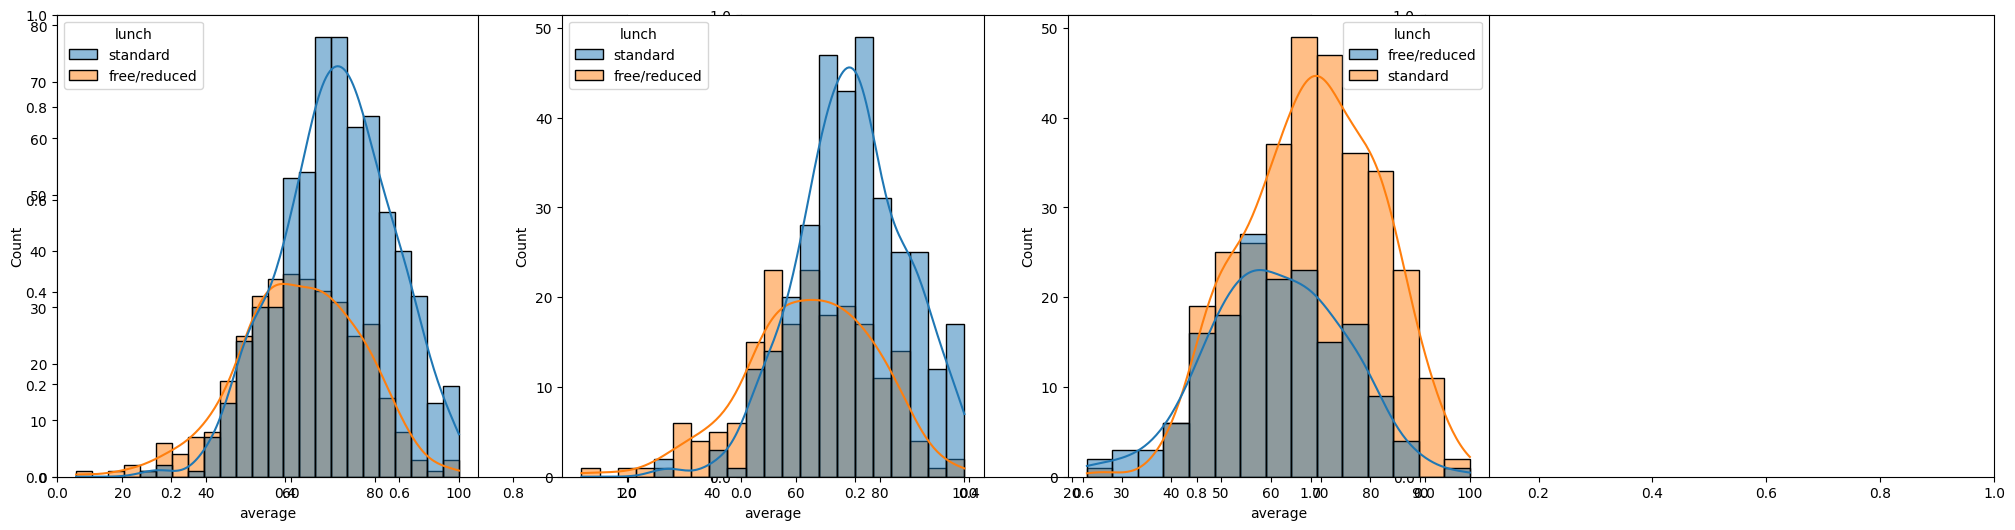

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**

             --Standard lunch helps perform well in exams.
                
             --Standard lunch helps perform well in exams be it a male or a female.

ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

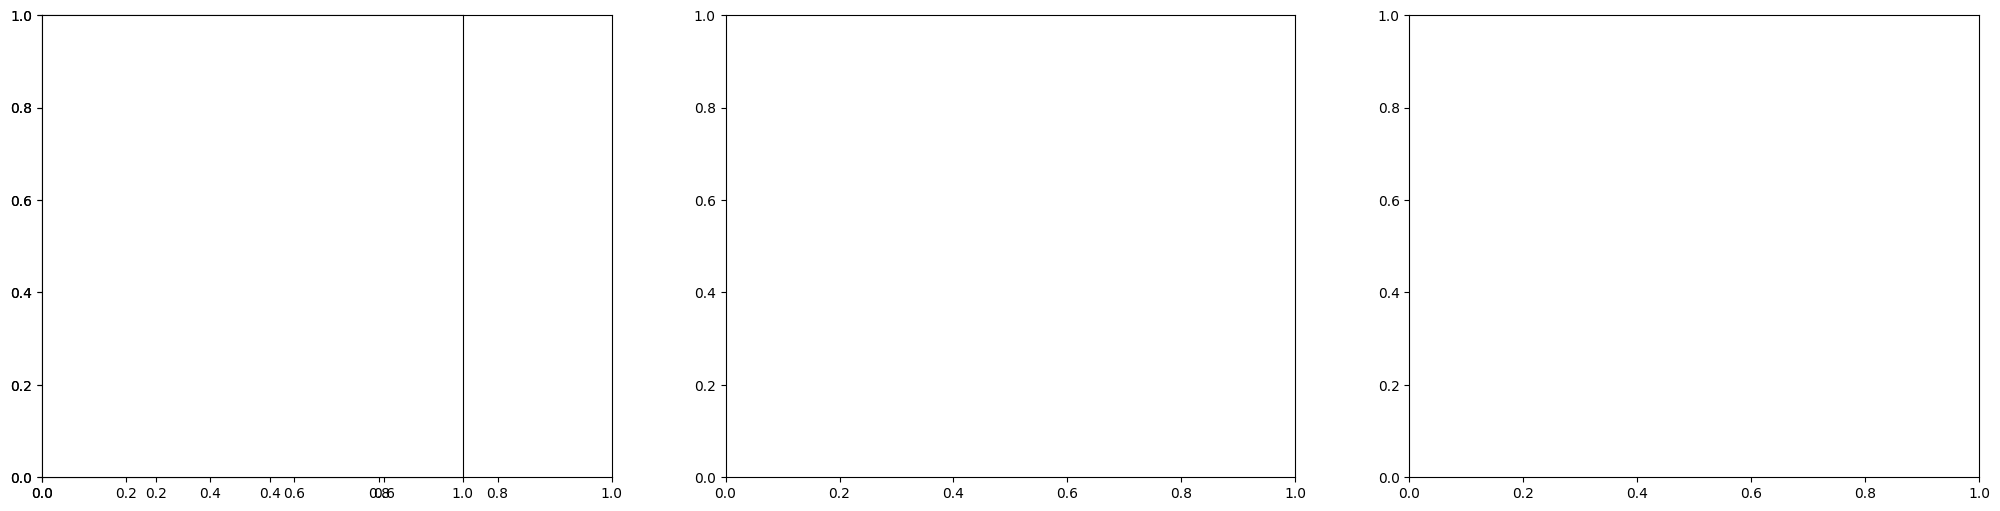

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

**Insights**
--In general parent's education don't help student perform well in exam.

--2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

--3rd plot we can see there is no effect of parent's education on female students.

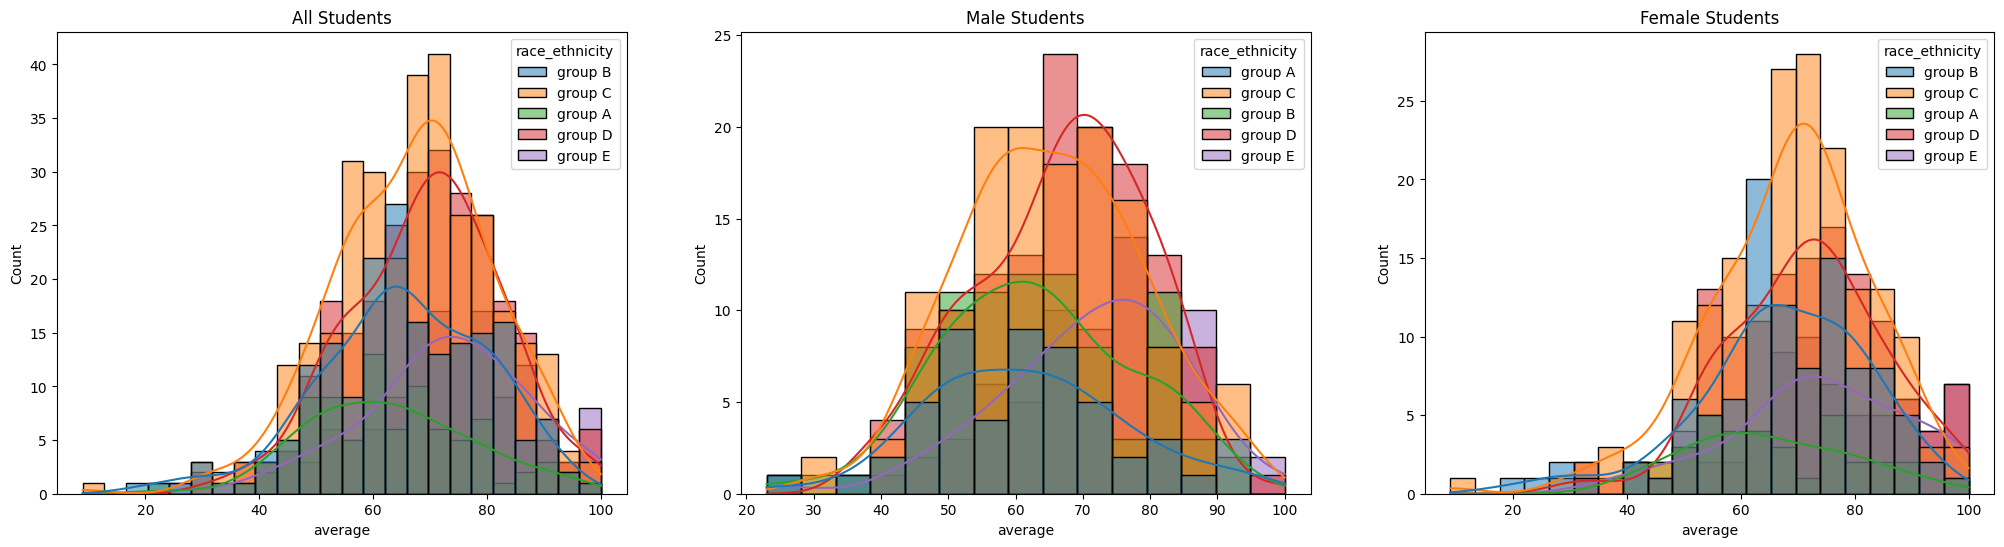

In [25]:
plt.figure(figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.title('Male Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.title('Female Students')

plt.show()

### Insights from the Analysis

1. Students belonging to **Group A** and **Group B** consistently show **lower average scores** compared to other groups.  
2. This pattern persists **across genders**, indicating that both male and female students in these groups tend to underperform.  
3. The trend suggests that **ethnicity (Group A & B)** might be associated with lower exam performance.

**4.2 Maximumum score of students in all three subjects**


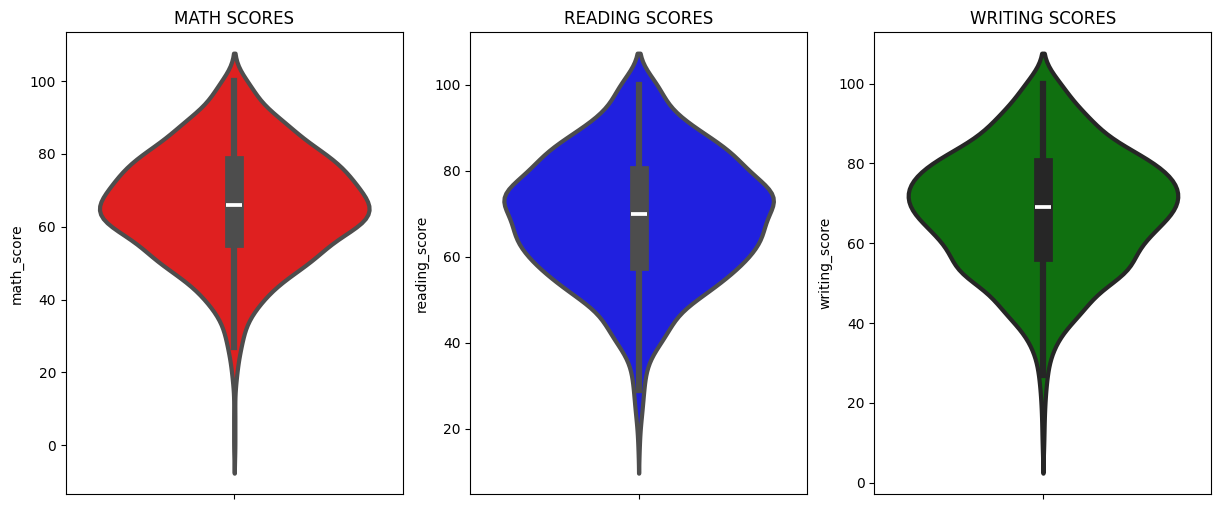

In [27]:
plt.figure(figsize=(20,6))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='blue', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='green', linewidth=3)

plt.show()

**Insights**

*From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80*

**4.3 Multivariate analysis using pieplot**

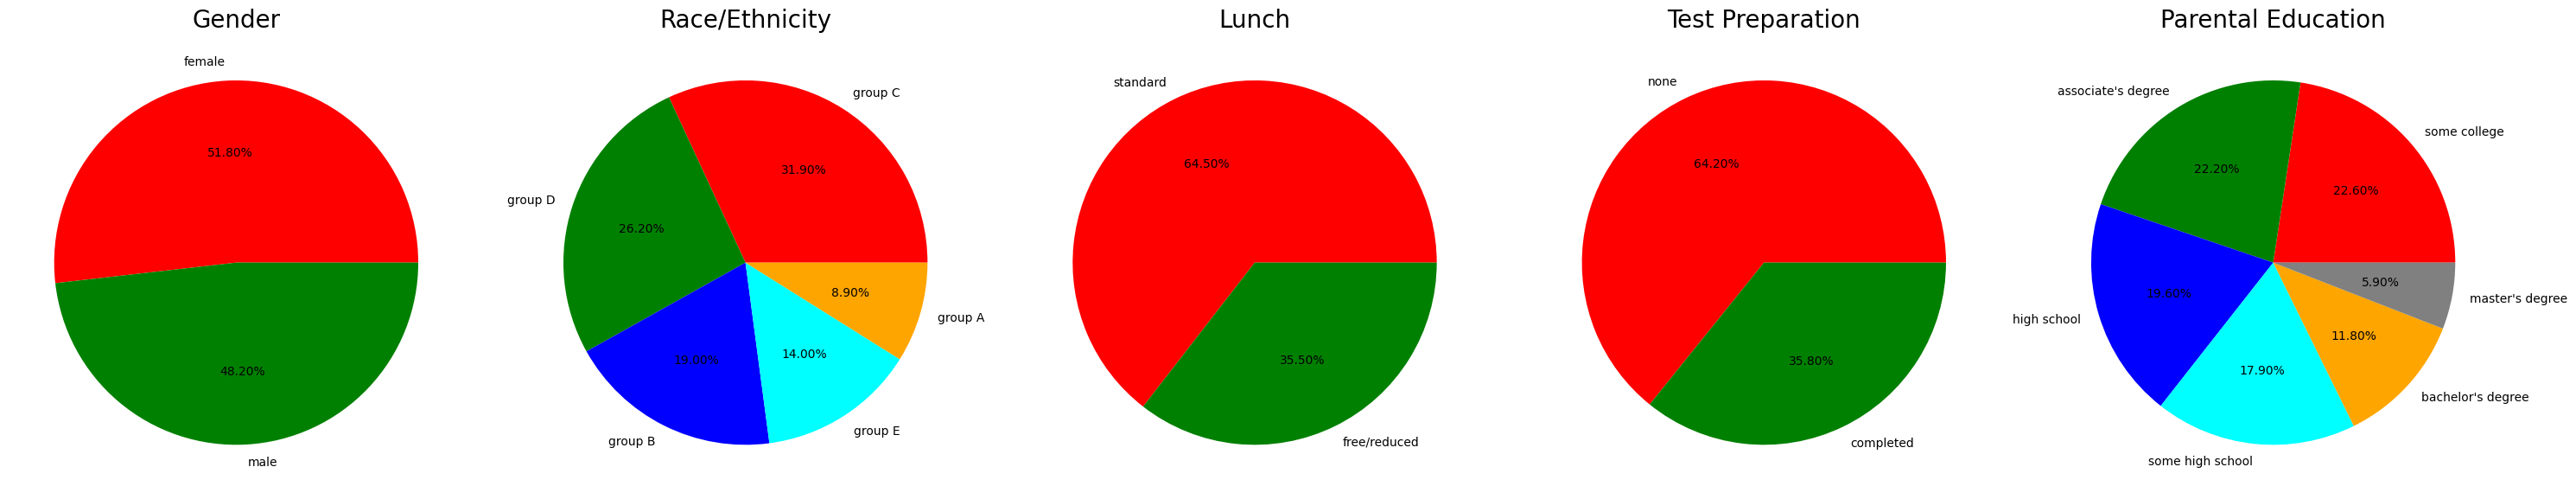

In [28]:


plt.rcParams['figure.figsize'] = (30, 12)

# 1. Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# 2. Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# 3. Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# 4. Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation', fontsize=20)
plt.axis('off')

# 5. Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


**Insights**
*1.Number of Male and Female students is almost equal*

*2.Number students are greatest in Group C*

*3.Number of students who have standard lunch are greater*

*4.Number of students who have not enrolled in any test preparation course is greater*

*5.Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"*

**4.4 Feature Wise Visualization**

**4.4.1 GENDER COLUMN**
*How is distribution of Gender ?*

*Is gender has any impact on student's performance ?*

**UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**

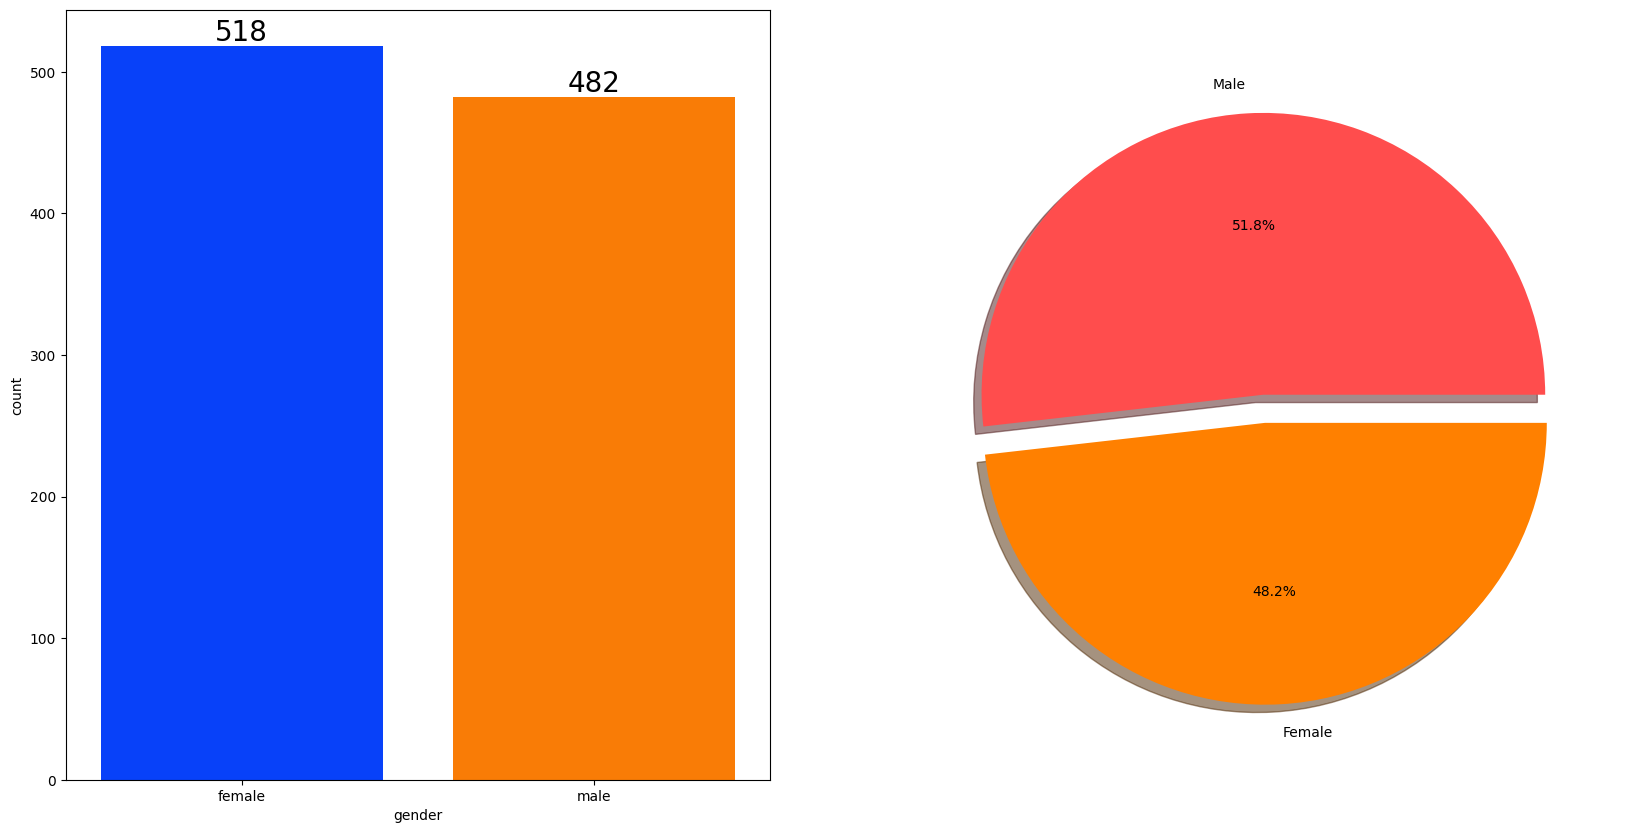

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
  
--Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

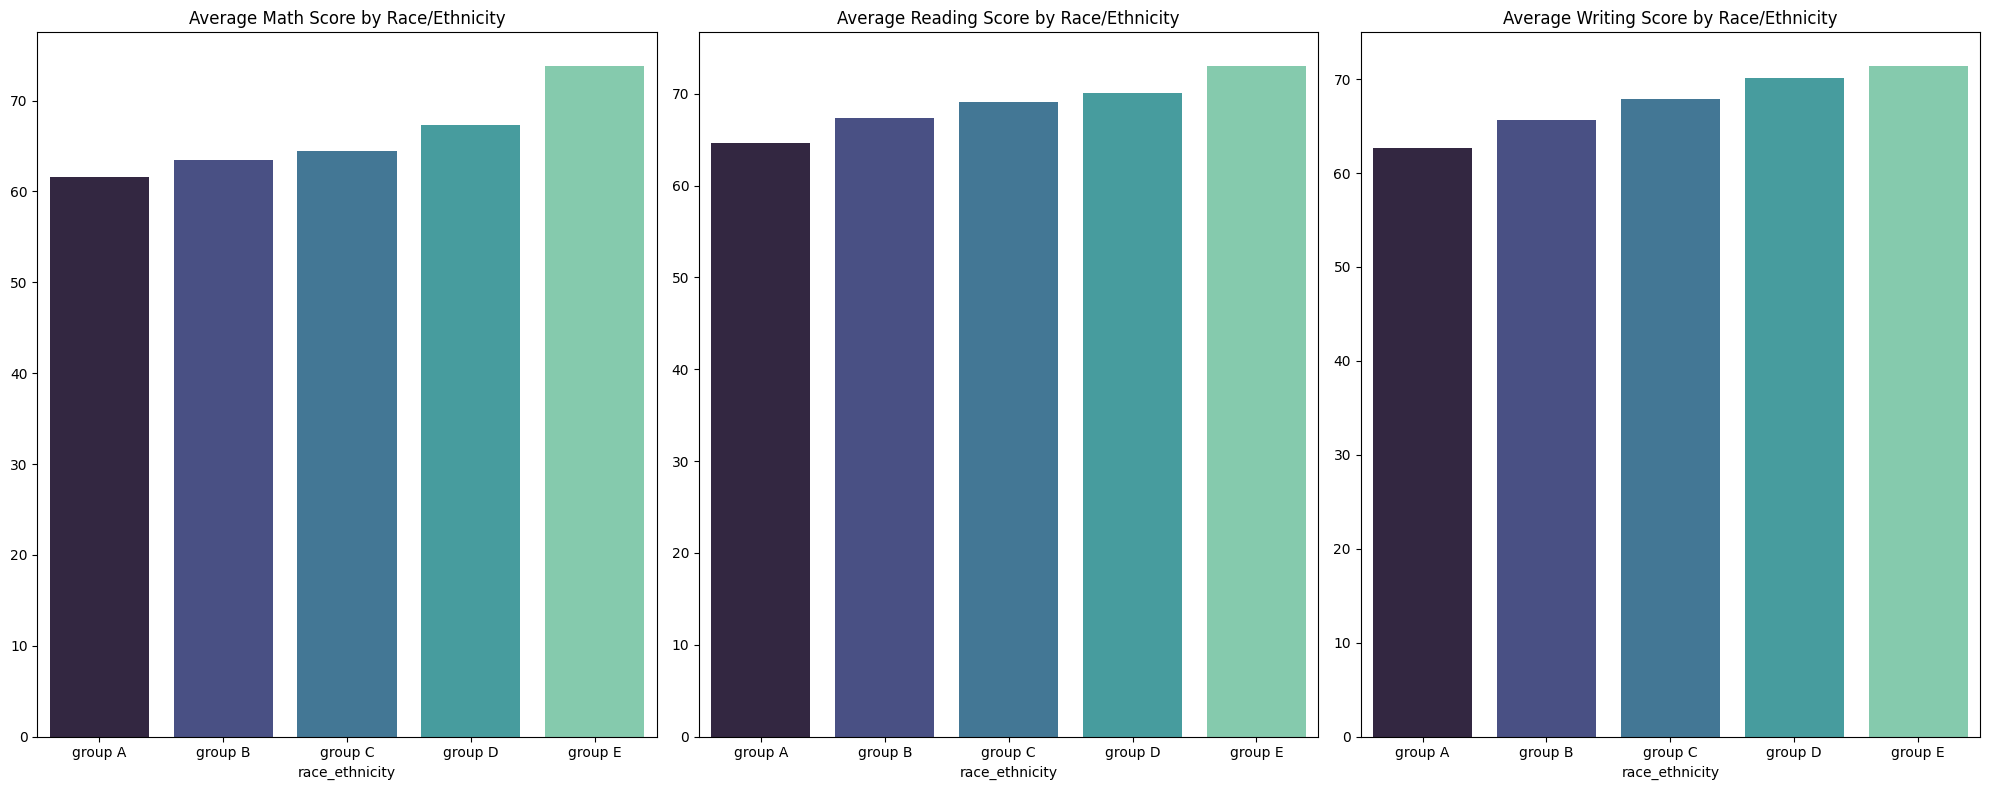

In [32]:


# 1. Group by race_ethnicity
Group_data2 = df.groupby('race_ethnicity')

# 2. Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# 3. Math Score
sns.barplot(
    x=Group_data2['math_score'].mean().index,
    y=Group_data2['math_score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Average Math Score by Race/Ethnicity')

# 4. Reading Score
sns.barplot(
    x=Group_data2['reading_score'].mean().index,
    y=Group_data2['reading_score'].mean().values,
    palette='mako',
    ax=ax[1]
)
ax[1].set_title('Average Reading Score by Race/Ethnicity')

# 5. Writing Score
sns.barplot(
    x=Group_data2['writing_score'].mean().index,
    y=Group_data2['writing_score'].mean().values,
    palette='mako',
    ax=ax[2]
)
ax[2].set_title('Average Writing Score by Race/Ethnicity')

plt.tight_layout()
plt.show()


# **Insights**

- **Group E students have scored the highest marks.**  
- **Group A students have scored the lowest marks.**  
- **Students from lower Socioeconomic status have a lower average in all course subjects.**  

---

## **4.4.3 Parental Level of Education Column**

**Questions to Explore:**  

- **What is the educational background of students' parents?**  
- **Does parental education have any impact on students' performance?**  

---

### **UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

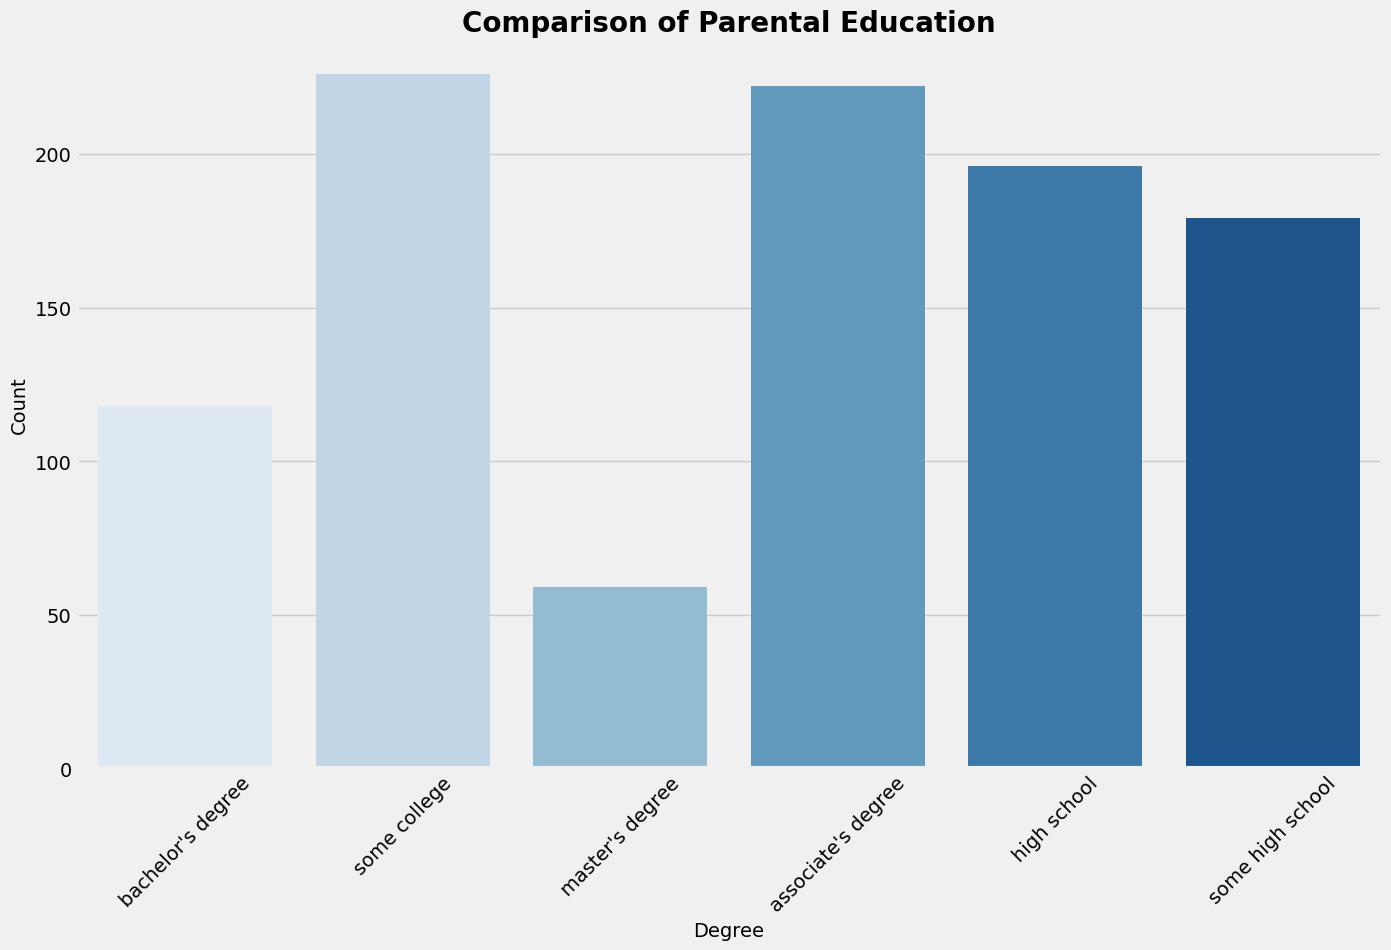

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# **Insights**
**Largest number of parents are from some college.**

# **BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

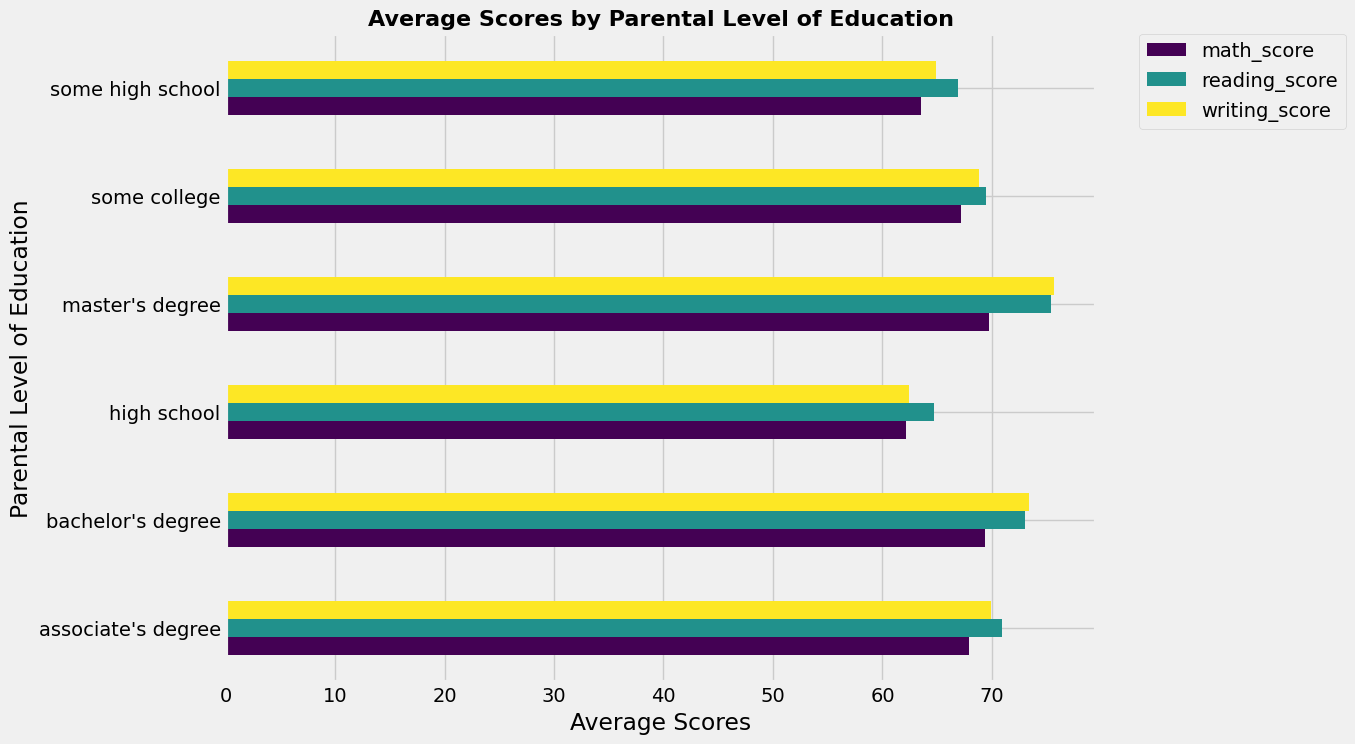

In [37]:
# Select only numeric columns
numeric_cols = ['math_score', 'reading_score', 'writing_score']

# Group by parental education and take mean of numeric columns only
df.groupby('parental_level_of_education')[numeric_cols].mean().plot(
    kind='barh', figsize=(10,8), colormap='viridis'
)
plt.title('Average Scores by Parental Level of Education', fontsize=16, fontweight='bold')
plt.xlabel('Average Scores')
plt.ylabel('Parental Level of Education')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# **Insights**
The score of student whose parents possess master and bachelor level education are higher than others.

**4.4.4 LUNCH COLUMN**

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

# **UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

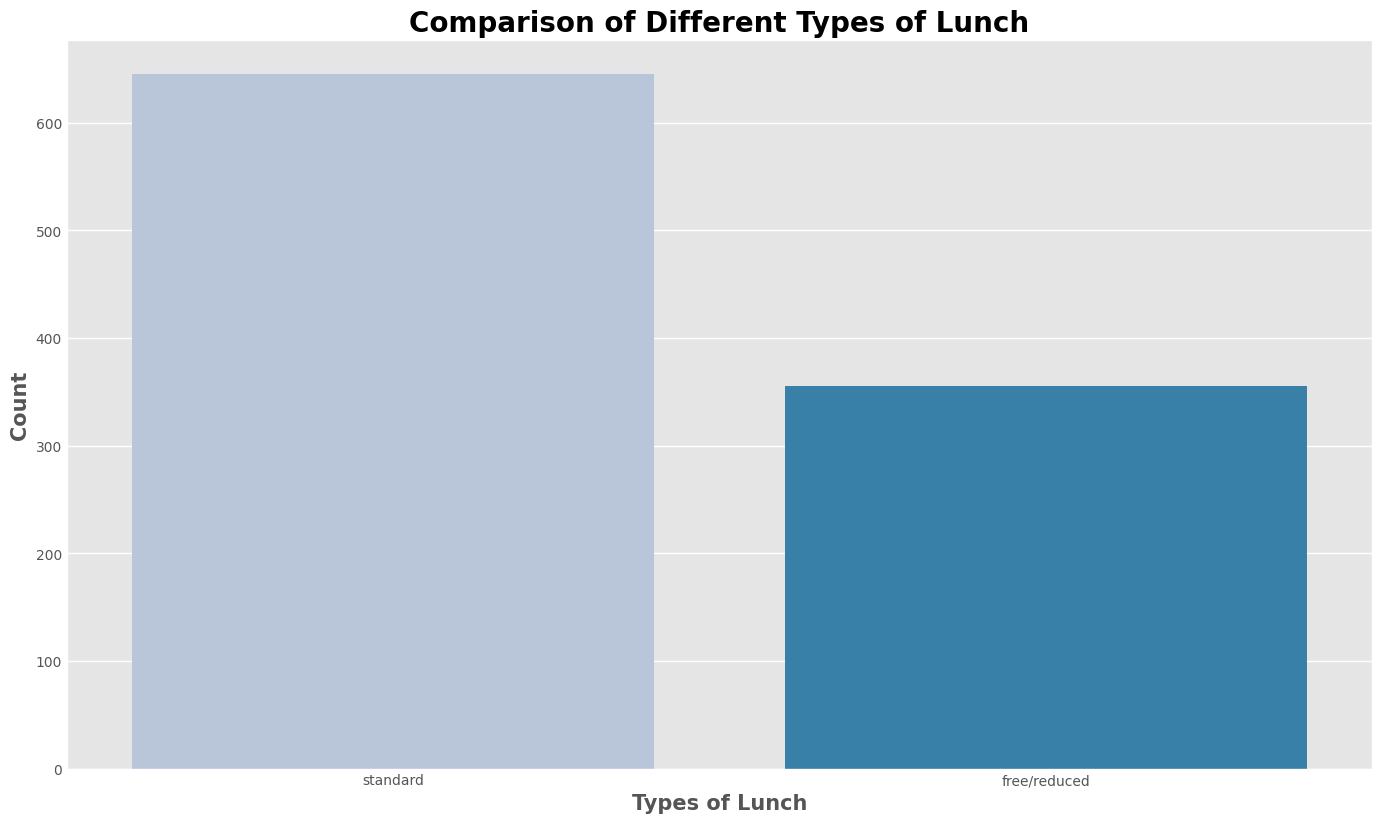

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')  # a valid built-in style

sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontsize=20, fontweight='bold')
plt.xlabel('Types of Lunch', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.show()

# **Insights**
--Students being served Standard lunch was more than free lunch

# **BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )**

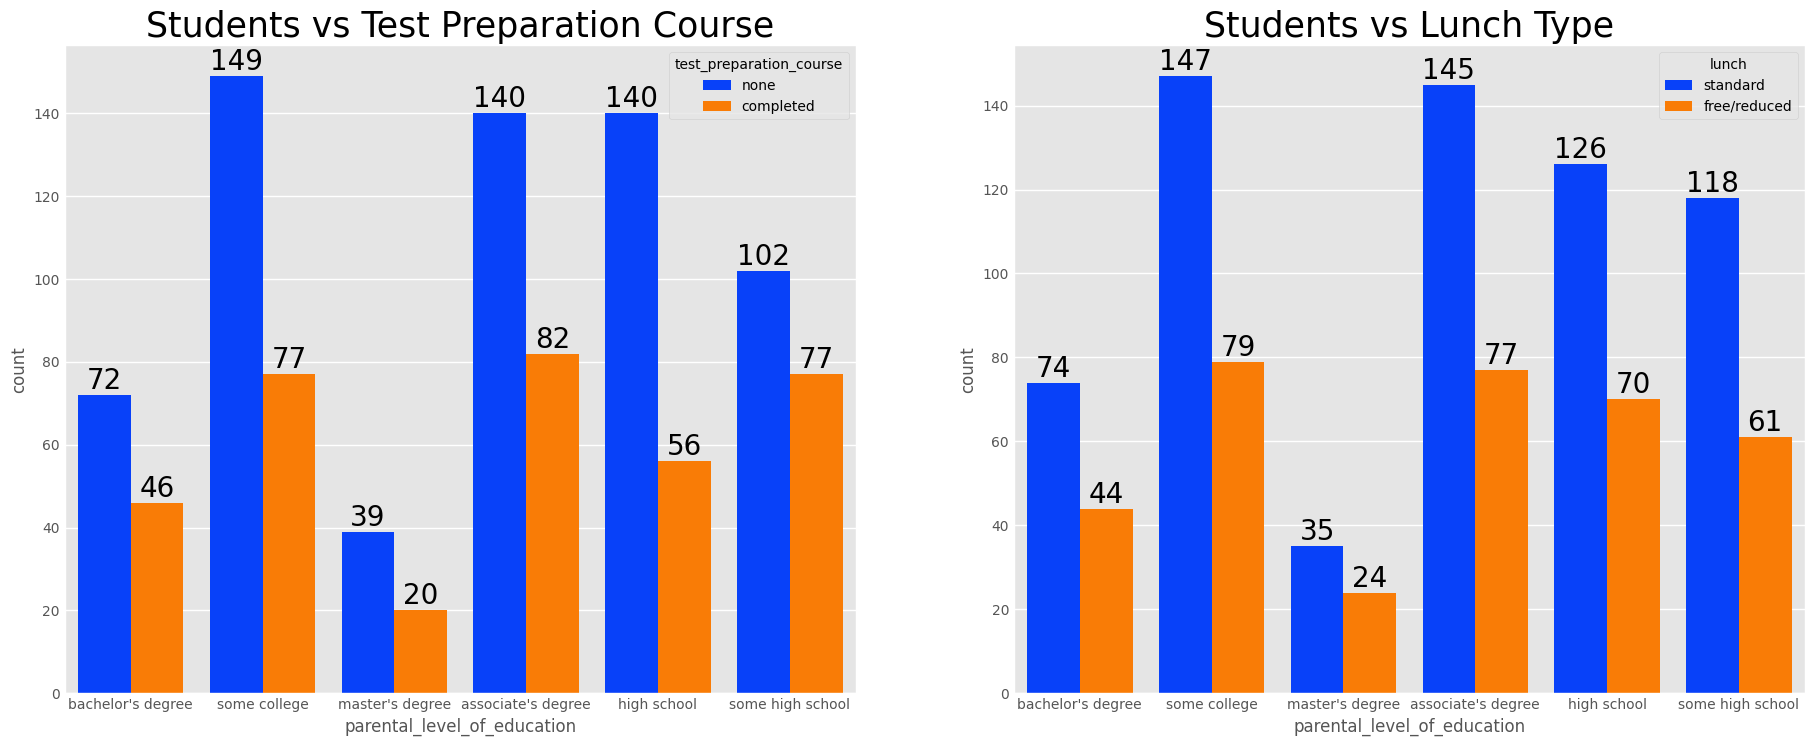

In [43]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Parental education vs Test preparation course
sns.countplot(
    x=df['parental_level_of_education'], 
    data=df, 
    palette='bright', 
    hue='test_preparation_course', 
    saturation=0.95, 
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot 2: Parental education vs Lunch type
sns.countplot(
    x=df['parental_level_of_education'], 
    data=df, 
    palette='bright', 
    hue='lunch', 
    saturation=0.95, 
    ax=ax[1]
)
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()


# **Insights**

- **Students who get Standard Lunch tend to perform better** than students who got free/reduced lunch.

## **4.4.5 TEST PREPARATION COURSE COLUMN**

- **Which type of lunch is most common among students?**
- **Does Test Preparation Course have any impact on student's performance?**

### **BIVARIATE ANALYSIS**
- **Question:** Is Test Preparation Course impacting student's performance?


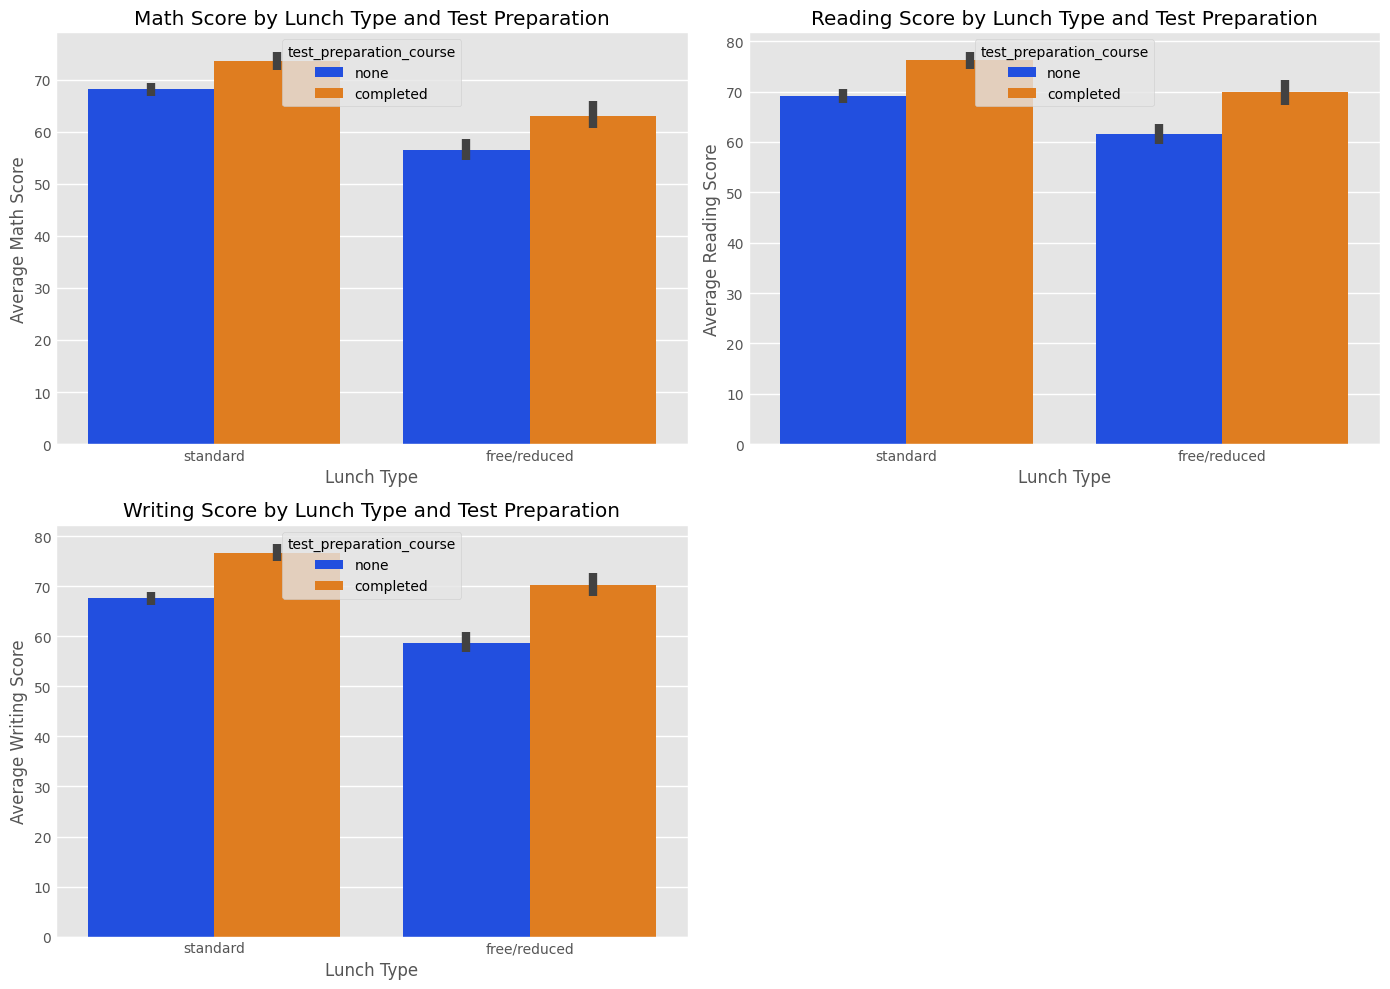

In [46]:
plt.figure(figsize=(14,10))

# Math Score vs Lunch & Test Preparation
plt.subplot(2,2,1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, palette='bright')
plt.title('Math Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Average Math Score')

# Reading Score vs Lunch & Test Preparation
plt.subplot(2,2,2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, palette='bright')
plt.title('Reading Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Average Reading Score')

# Writing Score vs Lunch & Test Preparation
plt.subplot(2,2,3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, palette='bright')
plt.title('Writing Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Average Writing Score')

plt.tight_layout()
plt.show()


# **Insights**
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

# **4.4.6 CHECKING OUTLIERS**

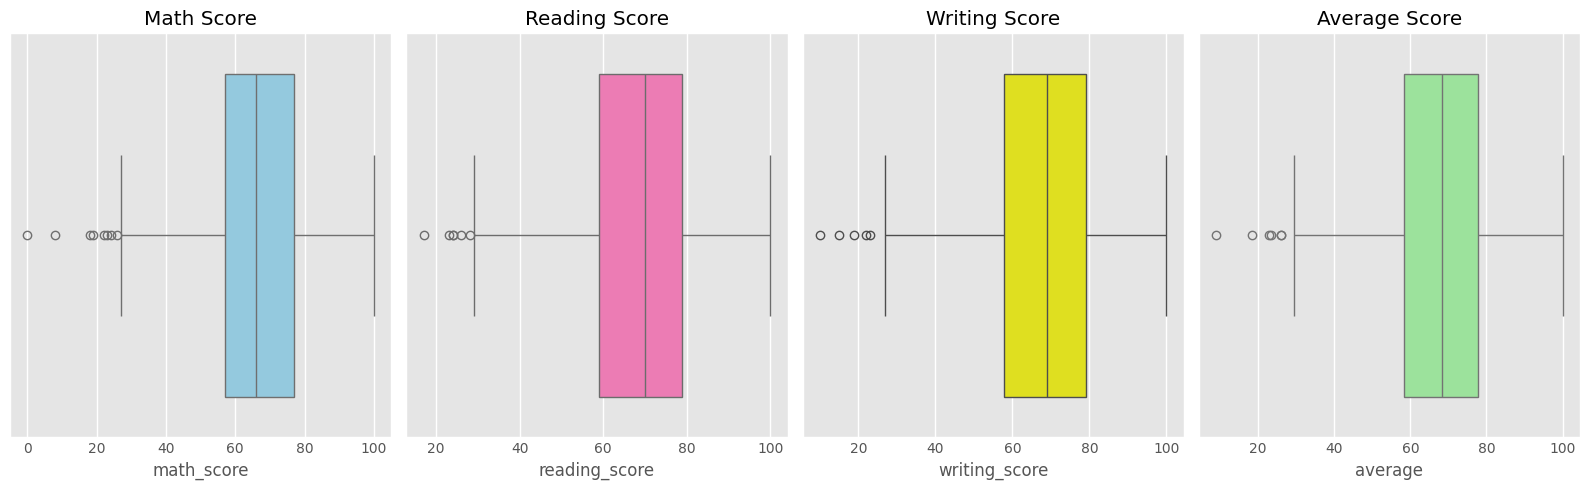

In [48]:
plt.figure(figsize=(16,5))

plt.subplot(141)
sns.boxplot(x='math_score', data=df, color='skyblue')
plt.title('Math Score')

plt.subplot(142)
sns.boxplot(x='reading_score', data=df, color='hotpink')
plt.title('Reading Score')

plt.subplot(143)
sns.boxplot(x='writing_score', data=df, color='yellow')
plt.title('Writing Score')

plt.subplot(144)
sns.boxplot(x='average', data=df, color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()


# **4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT**

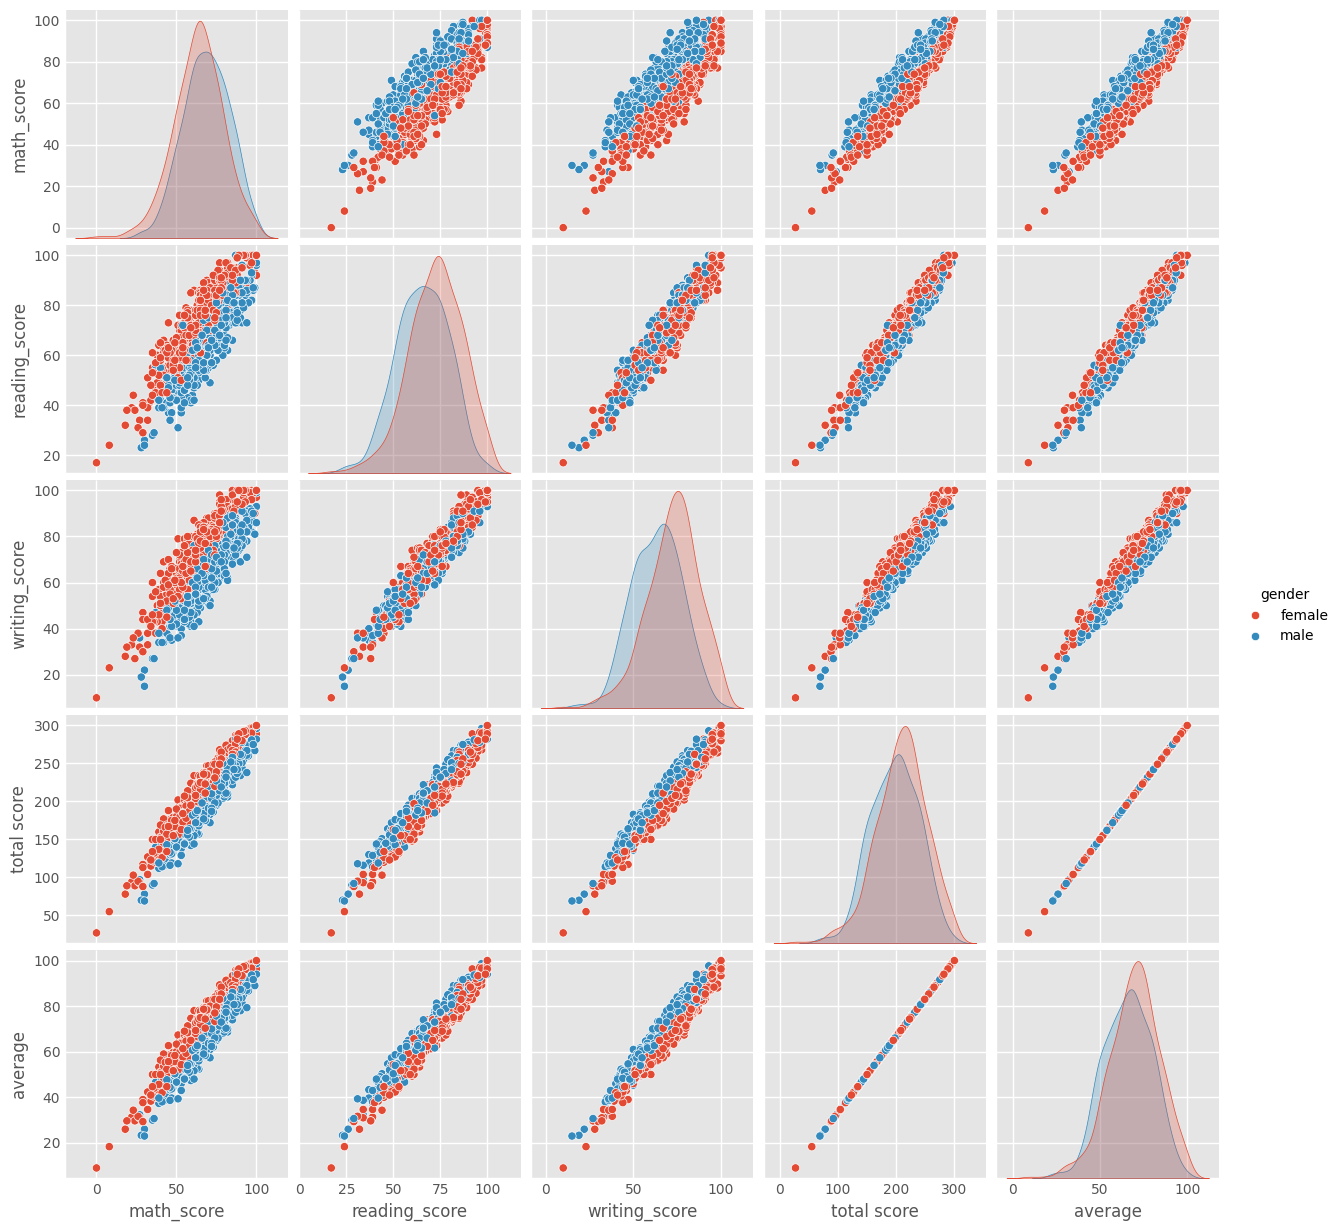

In [49]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**  
From the above plot, it is clear that **all the scores increase linearly with each other**.

**Conclusions**  
- **Student's Performance is related with lunch, race, parental level education**  
- **Females lead in pass percentage and also are top-scorers**  
- **Student's Performance is not much related with test preparation course**  
- **Finishing preparation course is beneficial**
